# Move and rename files

## Copying and renaming validated images from ift_cal-val
Initial samples had irregular case numbering, so we clean that up so all samples are enumerated in terms of increasing longitude within each region.

In [24]:
import pandas as pd
import os

In [28]:
df = pd.read_csv('../data/metadata/validation_dataset_case_list.csv', index_col=0, parse_dates=['start_date'])

In [42]:
existing = df.loc[df.init_case_number > 0].set_index('init_case_number')
existing.index = [str(n).zfill(3) for n in existing.index]

In [61]:
init_loc = '../../ift_cal-val/data/validation_images/'
new_loc = '../data/validation_images/'
floe_files = [f for f in os.listdir(init_loc + 'labeled_floes_png/') if 'png' in f]
landfast_files = [f for f in os.listdir(init_loc + 'labeled_landfast_png/') if 'png' in f]
landmask_files = [f for f in os.listdir(init_loc + 'landmask_png/') if 'png' in f]

for file in floe_files:
    init_cn, init_region, date, satellite, imtype = file.split('-')
    if init_cn in existing.index:
        for imtype in ['labeled_floes', 'labeled_landfast', 'landmask']:
            data = existing.loc[init_cn,:]

            new_cn = str(data.case_number).zfill(3)
            region = data.region
        
            # labeled_floes (png)
            init_path = init_loc + imtype + '_png/' + '-'.join([init_cn, init_region, date, satellite, imtype]) + '.png'
            new_path = new_loc + imtype + '/' + '-'.join([new_cn, region, date, satellite, imtype]) + '.png'
    
            if not os.path.exists(new_path):
                ! cp $init_path $new_path

cp: ../../ift_cal-val/data/validation_images/labeled_landfast_png/256-greenland_sea-20060616-terra-labeled_landfast.png: No such file or directory
cp: ../../ift_cal-val/data/validation_images/labeled_landfast_png/465-sea_of_okhostk-20150312-aqua-labeled_landfast.png: No such file or directory
cp: ../../ift_cal-val/data/validation_images/landmask_png/465-sea_of_okhostk-20150312-aqua-landmask.png: No such file or directory
cp: ../../ift_cal-val/data/validation_images/labeled_landfast_png/261-greenland_sea-20100728-terra-labeled_landfast.png: No such file or directory
cp: ../../ift_cal-val/data/validation_images/labeled_landfast_png/261-greenland_sea-20100728-aqua-labeled_landfast.png: No such file or directory
cp: ../../ift_cal-val/data/validation_images/labeled_landfast_png/256-greenland_sea-20060616-aqua-labeled_landfast.png: No such file or directory
cp: ../../ift_cal-val/data/validation_images/labeled_landfast_png/433-sea_of_okhostk-20170523-aqua-labeled_landfast.png: No such file or

In [59]:
init_loc = '../../ift_cal-val/data/validation_images/'
new_loc = '../data/validation_images/'
labeling_files = [f for f in os.listdir(init_loc + 'labeling_psd/analyzed/') if 'psd' in f]

for file in labeling_files:
    info = file.split('_')
    init_cn = info[0]
    satellite = info[-1].replace('.psd', '')
    date = info[-2]
    init_region = '_'.join(info[1:-2])
    
    if init_cn in existing.index:
    
        data = existing.loc[init_cn,:]

        new_cn = str(data.case_number).zfill(3)
        region = data.region
    
        # labeled_floes (png)
        init_path = init_loc + 'labeling_psd/analyzed/' + file
        new_path = new_loc + 'labeling_psd_files' + '/' + '-'.join([new_cn, region, date, satellite, 'labeling_psd']) + '.psd'

        if not os.path.exists(new_path):
            ! cp $init_path $new_path

In [62]:
init_loc = '../../ift_cal-val/data/validation_images/'
new_loc = '../data/validation_images/'
labeling_files = [f for f in os.listdir(init_loc + 'labeling_psd/not_yet_analyzed/') if 'psd' in f]

for file in labeling_files:
    info = file.split('_')
    init_cn = info[0]
    satellite = info[-1].replace('.psd', '')
    date = info[-2]
    init_region = '_'.join(info[1:-2])
    
    if init_cn in existing.index:
    
        data = existing.loc[init_cn,:]

        new_cn = str(data.case_number).zfill(3)
        region = data.region
    
        # labeled_floes (png)
        init_path = init_loc + 'labeling_psd/not_yet_analyzed/' + file
        new_path = new_loc + 'labeling_psd_files' + '/labeling_psd_tbd/' + '-'.join([new_cn, region, date, satellite, 'labeling_psd']) + '.psd'

        if not os.path.exists(new_path):
            ! cp $init_path $new_path

Next steps:
- Check missing images in the photoshop files
- Adjust the imsize to match
- Fix the touching floes, can use the julia get floe masks to investigate
- Set up tool to remove floes smaller than the stated minimum floe size (which should depend on something physical)

In [39]:
floe_files = [f for f in os.listdir(init_loc + 'labeled_floes_png/') if 'png' in f]


In [29]:
# Using PIL
# check if images are 400 by 400
# check if the images are strictly binary
for row, data in df.iterrows():
    if data.init_case_number > 0:
        cn = str(data.case_number).zfill(3)
        init_cn = str(data.init_case_number).zfill(3)
        region = data.region
        break
data

case_number                                     1
region                                 baffin_bay
start_date                    2022-09-11 00:00:00
center_lon                             -91.527525
center_lat                              77.801013
center_x                                -962500.0
center_y                                -912500.0
month                                           9
sea_ice_fraction                              1.0
mean_sea_ice_concentration                  0.573
init_case_number                               48
Name: 0, dtype: object

In [60]:
# Next: copy and rename relevant images from the IFT runs

# Check that the file name structure is right

cases = os.listdir('../data/ift_lopez-acosta-tiling/full_output/')
cases = [c for c in cases if c[0] != '.']
cases.sort()

for case in cases:
    case_number, region, dx, yyyy, mm, dd = case.split('-')
    startdate = yyyy + mm + dd
    dataloc = '../data/ift_lopez-acosta-tiling/full_output/{c}/work/'.format(c=case)
    
    for satellite in ['aqua', 'terra']:
        date_folder = '{sd}.250m.{sat}'.format(sd=startdate, sat=satellite)
        if date_folder in os.listdir(dataloc):
            contents = os.listdir(dataloc + '/' + date_folder)
    
            # Copy labeled image
            old_path = dataloc  + '/' + date_folder + '/labeled.tiff'
            new_path = "../data/ift_lopez-acosta-tiling/labeled_floes/" + '-'.join(
                [case_number, region, startdate, satellite, 'labeled_floes.tiff'])
            
            if 'labeled.tiff' in contents:
                if not os.path.exists(new_path):
                    ! cp $old_path $new_path
            
            if 'labeled.tiff' in contents:
                if not os.path.exists(new_path):
                    ! cp $old_path $new_path                    
                
            elif satellite=='aqua':
                if not os.path.exists(new_path):
                    pass
                    # print(case_number, 'no labeled image,', 'visible floes=', df.loc['{cn}_{sat}'.format(cn=case_number, sat=satellite), 'visible_floes'])

            # Copy labeled image
            old_path = dataloc  + '/' + date_folder + '/labeled.colorized.tiff'
            new_path = "../data/ift_lopez-acosta-tiling/labeled_colored_floes/" + '-'.join(
                [case_number, region, startdate, satellite, 'labeled_colorized_floes.tiff'])
            
            if 'labeled.colorized.tiff' in contents:
                if not os.path.exists(new_path):
                    ! cp $old_path $new_path
            
            if 'labeled.colorized.tiff' in contents:
                if not os.path.exists(new_path):
                    ! cp $old_path $new_path                    
                
            elif satellite=='aqua':
                if not os.path.exists(new_path):
                    pass
            # Copy MODIS images
            # 1. Cloud fraction
            old_path = dataloc + '/' + date_folder + '/cloud.tiff'
            new_path = "../data/modis/cloudfraction/" + '-'.join(
                [case_number, region, dx, startdate]) + '.' + satellite + '.cloudfraction.250m.tiff'
            if os.path.exists(old_path):
                ! cp $old_path $new_path

            # 2. True color
            old_path = dataloc + '/' + date_folder + '/truecolor.tiff'
            new_path = "../data/modis/truecolor/" + '-'.join(
                [case_number, region, dx, startdate]) + '.' + satellite + '.truecolor.250m.tiff'
            if os.path.exists(old_path):
                if not os.path.exists(new_path):
                    ! cp $old_path $new_path
            

            # 3. False color
            old_path = dataloc + '/' + date_folder + '/falsecolor.tiff'
            new_path = "../data/modis/falsecolor/" + '-'.join(
                [case_number, region, dx, startdate]) + '.' + satellite + '.falsecolor.250m.tiff'
            if os.path.exists(old_path):
                if not os.path.exists(new_path):
                    ! cp $old_path $new_path

            # 4. Landmask
            old_path = dataloc + '/' + date_folder + '/landmask.tiff'
            new_path = "../data/modis/landmask/" + '-'.join(
                [case_number, region, dx, startdate]) + '.' + satellite + '.landmask.250m.tiff'
            if os.path.exists(old_path):
                if not os.path.exists(new_path):
                    ! cp $old_path $new_path

        else:
            pass
            # print(case_number, 'work folder empty', dataloc)

# Making blank templates with correct names

In [76]:
import pandas as pd
import os

df = pd.read_csv('../data/metadata/merged_validation_table.csv',
                parse_dates=['start_date'])

In [67]:
completed = os.listdir('../data/validation_images/labeling_psd_files/')
completed = [f for f in completed if '.psd' in f]

In [80]:
df.index = [str(x).zfill(3) + '_' + satellite for x, satellite in zip(df.case_number, df.satellite)]

In [92]:
saveloc = '../data/validation_images/labeling_psd_files/labeling_psd_templates/'
for case, data in df.iterrows():
    if data.visible_floes == 'yes':
        filename = '-'.join([str(data.case_number).zfill(3),
                            data.region, 
                            data.start_date.strftime('%Y%m%d'),
                            data.satellite,
                            'labeling_psd.psd'])
        if filename not in completed:
            ! cp $ref_file $saveloc$filename
            

In [90]:
ref_file = '../data/validation_images/labeling_psd_files/labeling_psd_templates/psd_template.psd'

# Renaming files from labeled to binary


In [1]:
import os

In [ ]:
os.listdir('../data/validation_images/')
for folder in ['binary_landfast', 'binary_floes']:
    dataloc = '../data/validation_images/' + folder + '/'
    files = os.listdir(dataloc)
    for file in files:
        if '.png' in file:
            newfile = file.replace('labeled', 'binary')
            ! cp $dataloc$file $dataloc$newfile


# Labeling the binary floe images

In [43]:
# simple script: save the labeled images
import skimage as sk
import os
binary_dataloc = "../data/validation_images/binary_floes/"
files = [f for f in os.listdir(binary_dataloc) if 'png' in f]
for file in files:
    im = sk.io.imread(binary_dataloc + file)[:,:,0]
    labeled_dataloc = binary_dataloc.replace("binary", "labeled")
    labeled_im = sk.measure.label(im).astype(float)
    sk.io.imsave(labeled_dataloc + file.replace("binary", "labeled").replace("png", "tiff"), 
             labeled_im, check_contrast=False)

In [24]:
files.sort()

In [41]:
import numpy as np
file = '012-baffin_bay-20090426-aqua-binary_floes.png'
im = sk.io.imread(binary_dataloc + file)
labeled_dataloc = binary_dataloc.replace("binary", "labeled")
labeled_im = sk.measure.label(im[:,:,0], background=0).astype(float)


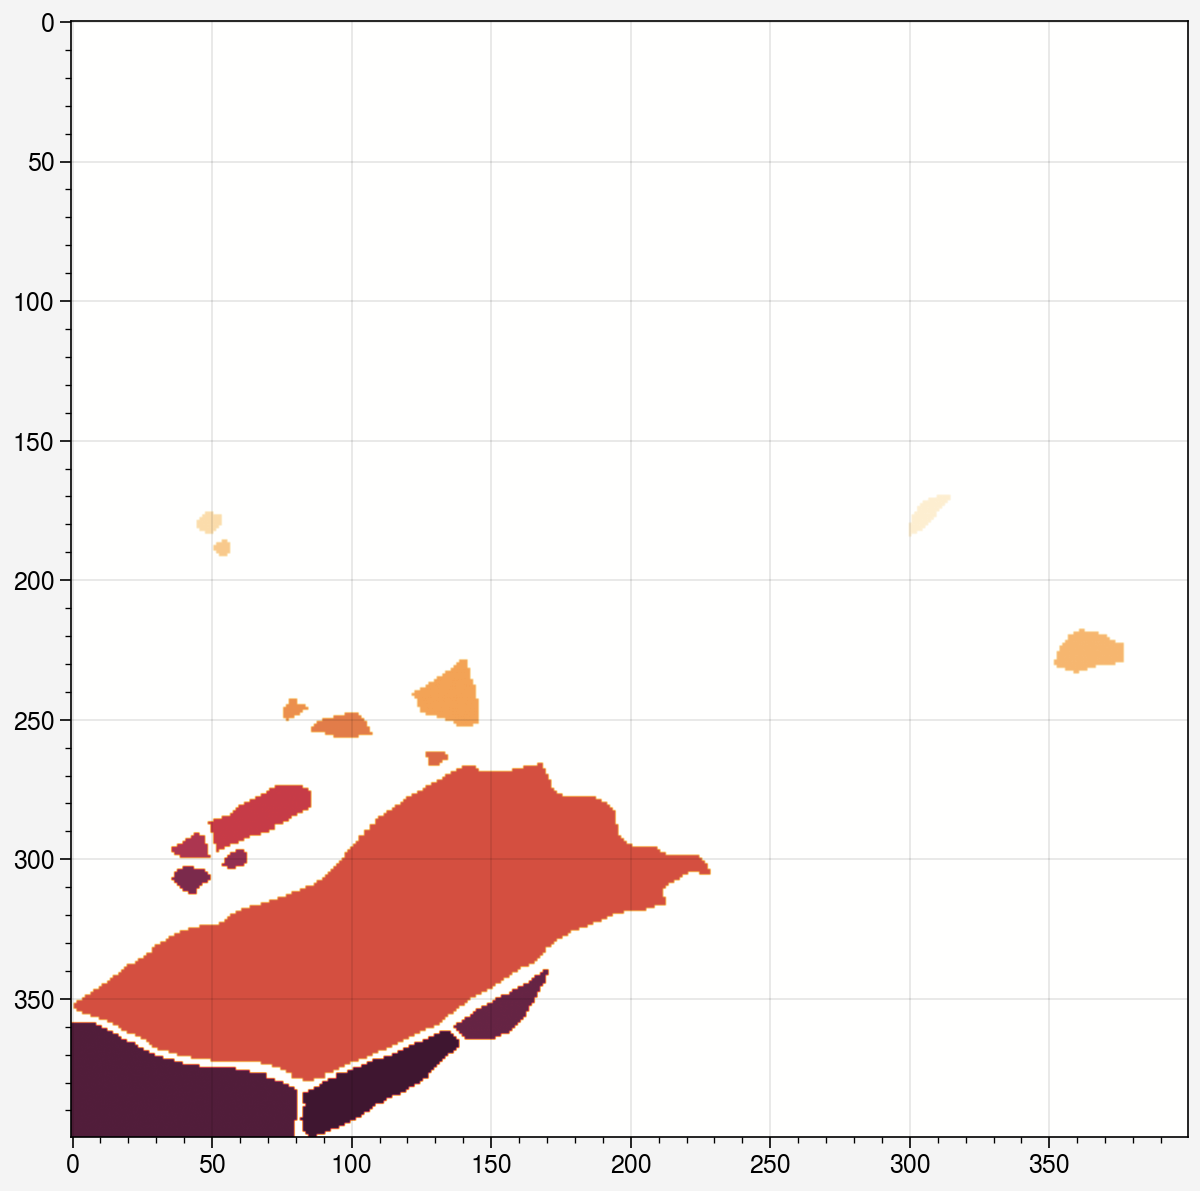

In [45]:
import proplot as pplt
fig, ax = pplt.subplots(width=6)
labeled_im = sk.io.imread(labeled_dataloc + '012-baffin_bay-20090426-terra-labeled_floes.tiff')
ax.imshow(labeled_im)

In [22]:
im.shape

(400, 400, 4)